In [1]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
#!pip install deap
import pandas as pd
import re
import numpy as np 
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from deap import algorithms, base, creator, tools
from nltk import word_tokenize
import re
import random
from statistics import mean
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /home/spetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
dict_freq = {}  # frequency map for words in list
dict_paired_freq = {}

path = 'train-data.dat'
clean_files = []
df = pd.DataFrame()

file = open(path).readlines()
len(file)

#clear data
clear_file=[]
for i in range(len(file)):
    x=re.sub('<.*?>','',file[i])
    clear_file.append(x)

clear_file=clear_file[:]

#perasma tou clear keimenou sto words string
words = ''
for line in clear_file:
    words += line


tokenized_words = word_tokenize(words) # list of all words in new dictionary
WORD_LIST = list(set(tokenized_words)) # create a set out of words so there are no repeats in word list and make list again
dictionary_size = len(WORD_LIST) #6853


#Dhmiourgia dictionary lekseis kai suxnotitas emfanisi tis lekseis se olo to keimeno
for word in tokenized_words: #gia kathe word sto lista leksewn olou tou keimenou
    if word not in dict_freq: 
        dict_freq[word] = 1
    else:
        dict_freq[word] += 1

dict_freq

{'6705': 554,
 '5997': 378,
 '8310': 46,
 '3606': 301,
 '674': 6376,
 '8058': 407,
 '5044': 120,
 '4836': 1018,
 '4312': 3478,
 '5154': 4695,
 '4225': 552,
 '1827': 311,
 '1037': 742,
 '8482': 718,
 '483': 834,
 '3567': 35,
 '6172': 726,
 '2892': 2270,
 '1362': 1254,
 '787': 622,
 '399': 1353,
 '777': 2175,
 '1332': 1720,
 '318': 135,
 '769': 89,
 '4621': 3250,
 '3199': 1022,
 '1480': 233,
 '6213': 285,
 '971': 1100,
 '6890': 3897,
 '5909': 2003,
 '15': 26,
 '3445': 46,
 '2475': 132,
 '324': 45,
 '4138': 72,
 '3404': 96,
 '6176': 8,
 '65': 2722,
 '2926': 324,
 '1375': 613,
 '7705': 10,
 '709': 9,
 '1323': 162,
 '1652': 6,
 '5735': 567,
 '7439': 2506,
 '4396': 222,
 '4382': 1151,
 '1798': 16,
 '1870': 59,
 '1845': 67,
 '4410': 128,
 '7758': 6,
 '4278': 10,
 '7775': 25,
 '2898': 44,
 '1923': 111,
 '8193': 45,
 '2930': 617,
 '485': 24,
 '5951': 139,
 '6123': 67,
 '2480': 90,
 '3158': 1616,
 '2193': 31,
 '2438': 8,
 '7485': 22,
 '3412': 577,
 '5304': 78,
 '5644': 112,
 '3734': 9,
 '7459': 

In [13]:
#TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tf=computeTF(dict_freq,tokenized_words)

#IDF: log((Total number of sentences (documents))/(Number of sentences (documents) containing the word))
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(dict_freq,0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return idfDict

idf=computeIDF(dict_freq)
len(idf)

8520

In [15]:
#FINAL TF-IDF
def computeDFIDF(tfbow,idfs):
    tfidf={}
    for word,val in tfbow.items():
        tfidf[word] = val*idfs[word]

    return tfidf

In [20]:
#final TF-IDF
Tf_idf=computeDFIDF(tf,idf)
#Apothikeusi mono ton timwn
new_list = list(Tf_idf.values())
len(new_list)
tf_idf_Xtrain = np.asarray(new_list)
Tf_idf



{'6705': 0.0021653505644432564,
 '5997': 0.001477441359854785,
 '8310': 0.00017979445119925953,
 '3606': 0.0011764810828473289,
 '674': 0.024921074366227803,
 '8058': 0.00159079003561084,
 '5044': 0.0004690290031285032,
 '4836': 0.003978929376540135,
 '4312': 0.01359402394067445,
 '5154': 0.018350759747402686,
 '4225': 0.002157533414391115,
 '1827': 0.0012155668331080374,
 '1037': 0.002900162669344578,
 '8482': 0.0028063568687188775,
 '483': 0.0032597515717430973,
 '3567': 0.00013680012591248009,
 '6172': 0.002837625468927444,
 '2892': 0.008872465309180852,
 '1362': 0.004901353082692858,
 '787': 0.0024311336662160747,
 '399': 0.005288302010273873,
 '777': 0.00850115068170412,
 '1332': 0.006722749044841879,
 '318': 0.0005276576285195661,
 '769': 0.0003478631773203065,
 '4621': 0.012702868834730294,
 '3199': 0.003994563676644419,
 '1480': 0.0009106979810745103,
 '6213': 0.001113943882430195,
 '971': 0.004299432528677946,
 '6890': 0.01523171687659814,
 '5909': 0.007828875777219933,
 '15':

In [6]:
#Create a FitnessMax class 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#Create an Individual class 
creator.create("Individual", list, fitness=creator.FitnessMax)

def getFitness(individual):
    counter = 0
    fitness = 0

    #gia kathe thesi sto indi
    for word_index in individual:
        #vale sto string thn antistoixi leksi
        if new_list[word_index] < 1:
            fitness += new_list[word_index]
    #penalty for >1000 times of 1
    counter = 0 
    for word_index in individual:  
        if word_index==1:
            counter+=1
    if counter<1000:
        fitness -= 10
    else:
        pass
  
    return fitness,

        
#The toolbox is a container for functions with their arguments
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(new_list))
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# Register the genetic operators	
toolbox.register("evaluate", getFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

1 ITERATION 
-- Generation 1 --
 Max fitness:15.563007695807395 && Average fitness:15.542542396970896
-- Generation 2 --
 Max fitness:15.58433288114963 && Average fitness:15.554099271607978
-- Generation 3 --
 Max fitness:15.593963610013864 && Average fitness:15.568132619381577
-- Generation 4 --
 Max fitness:15.60634597569645 && Average fitness:15.580686962365315
-- Generation 5 --
 Max fitness:15.603594338878096 && Average fitness:15.58622463146225
-- Generation 6 --
 Max fitness:15.62285579660657 && Average fitness:15.596164919468546
-- Generation 7 --
 Max fitness:15.630422797857035 && Average fitness:15.611539690191089
-- Generation 8 --
 Max fitness:15.642117254335039 && Average fitness:15.625332269743087
-- Generation 9 --
 Max fitness:15.641429345130446 && Average fitness:15.62945972497061
-- Generation 10 --
 Max fitness:15.643493072744214 && Average fitness:15.634550253084566
-- Generation 11 --
 Max fitness:15.64486889115339 && Average fitness:15.637026726221086
-- Generatio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 Max fitness:15.696462081497517 && Average fitness:15.69326330369618
-- Generation 101 --
<-------------------ITERATION 10 COMPLETED ----------------->
 Max fitness:15.696462081497517 && Average fitness:15.694123190201918
<------------------------- APOTELESMATA ------------------------>
Avg for generations: 51.99009900990099
Best fitness of best individual: 15.750118999455403
Avg fitness of best individual: 15.711288908700169


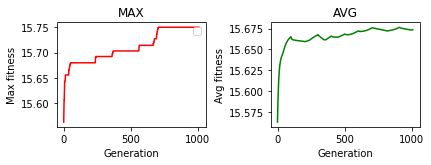

Best solution of best individual: [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [19]:
population_size=200
prob_cross = 0.9
prob_mutation = 0.01
genererations = 10

averege_Fitness_all_gen=list()
maxFitness_all_gen=list()
Howmanygenerations =list()
BestFitnessForAllGens =list()
BestFitnessPerGens =list()
BestFitness = list()
genbest=list()
best={}
final_Bestfitness=list()
X=[]

def main(population_size,prob_cross,prob_mutation):
  
  
  for i in range(10): # iterations
      print("%d ITERATION "%(i+1))

       # dimiourgia plithismou
      pop = toolbox.population(n=population_size)

    #Evaluation fitness function 
      fitnesses = list(map(toolbox.evaluate, pop))
      for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

   
  
    # CXPB pithanotita zeugaromatos
    # MUTPB pithanotita metalakseis
      CXPB, MUTPB = prob_cross, prob_mutation

      #Statistics
      stats = tools.Statistics(key=lambda ind:ind.fitness.values)
      record = stats.compile(pop)
      log = tools.Logbook()
      log.record(gen=0, **record)

	# Extracting all the fitnesses of (epistrefi to fitness)
      fits = [ind.fitness.values[0] for ind in pop]
	
    # Variable keeping track of the number of generations
    #metritis gia generation
      generation=0
      #Save to fitness pou exoume
      previous_fit=max(fits)
      #best fitness apo oles tis genies
      bestfitness=0
  #creteria 
      g = 1
      critiria = False 
      max_g=1000
      fitness_unchanged = 0

  # Begin the evolution
      while critiria==False :
        generation +=1

    # A new generation
        print("-- Generation %i --" % generation) 

    # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring)) 

    # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values


    # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

    # Replace the old population by the offspring
        pop[:] = offspring

    
    # Gather all the fitnesses in one list and print the stats
        fitness = [ind.fitness.values[0] for ind in pop]

        record = stats.compile(pop)
        log.record(gen=g, **record)  
        best = log.select("max")

    #CRETERIA FOR WHILE LOOP(OSO TO TERM=FALSE trexei h while)
        # reached max number of generations
        if g >= max_g:
            critiria = True
            print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
        # best individual of gen is <1% better than best individual of previous gen
        elif (g > 100) and max(fits) < (1.001*previous_fit):
            critiria = True
            print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
        # best individual of gen is same as best individual of previous gen
        elif (g > 100) and previous_fit == max(fits):
            fitness_unchanged += 1
            #ean g>25 kai exw 5 fores stasimo fitness tote critiria=True
            if fitness_unchanged >= 5:
                critiria = True
                print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
            else:
                g += 1
        # else continue
        else:
            fitness_unchanged = 0
            g += 1



      
#------------------------------------EKTELESI GIA KATHE GENIA-----------------------------------------------------------------------------
        #GIA KATHE GENERATION:
        maxFitness_per_gen=(max(fitness))
        average_fitness_per_gen = ((sum(fitness)/len(pop)))
        print(" Max fitness:%s && Average fitness:%s" %((maxFitness_per_gen),(average_fitness_per_gen)))
    

#--------------------------------------TO MEGALITERO KATHE GENIAS KAI TO ANTISTOIXO AVG ----------------------------------------------------------------------
        maxFitness_all_gen.append(maxFitness_per_gen)
        averege_Fitness_all_gen.append(average_fitness_per_gen)

        #TWRA THELOUME APO OLES TIS GENIES NA KRATISOUME MONO ENA, TO MEGALITERO 
        final_Bestfitness.append(max(maxFitness_all_gen))

#----------------------------------------------SUNOLIKES GENIES EKTELESIS---------------------------------------------------------------------------------
        Howmanygenerations.append(g)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
        #PREPEI NA VROUME TO BEST FITNESS 
        best_fitness =max(fitness)
        if best_fitness > bestfitness:
            bestfitness = best_fitness
            Bestindex =pop[fitness.index(best_fitness)]
        BestFitnessPerGens.append(best_fitness)

         
        #Vale stin lista mono to megalutero stoixio pou vrikes
        BestFitnessForAllGens.append(max(BestFitnessPerGens))
        X.append(mean(BestFitnessPerGens))
#################################################################################
      

################################################################################ 

  best_ind =tools.selBest(pop,1)[0]
  print("<------------------------- APOTELESMATA ------------------------>")
  print("Avg for generations:",mean(Howmanygenerations))
  print("Best fitness of best individual:",np.amax(max(BestFitnessForAllGens)))
  print("Avg fitness of best individual:",np.mean(BestFitnessForAllGens))


  plt.figure(0)
  plt.subplot(2, 2, 1)
  plt.plot(BestFitnessForAllGens,color='red')
  plt.title("MAX")
  plt.ylabel("Max fitness")
  plt.xlabel("Generation")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.plot(X,color="green")
  plt.title("AVG")
  plt.ylabel("Avg fitness")
  plt.xlabel("Generation")
  plt.tight_layout()
  plt.show()

  print("Best solution of best individual:",(best_ind))

  return best_ind
 
keep = main(population_size,prob_cross,prob_mutation)  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
tf_idf_Xtrain=tf_idf_Xtrain[:8251]
labels_fnames = [
            'train-label.dat',
            ]
y = pd.read_csv(labels_fnames[0] , delimiter = ' ', header = None)


clean_doc = []
wordfreq = {}
for doc in file:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
            
from nltk.probability import FreqDist
fdist = FreqDist()

sentence_vectors = []
for doc in file:
    doc_tokens = nltk.word_tokenize(doc)
    vec = []
    for token in wordfreq:
        if token in doc_tokens:
            count = 0
            for tok in doc_tokens:
                if tok == token:
                    count += 1
            vec.append(count)
        else:
            vec.append(0)
    sentence_vectors.append(vec)




In [ ]:
X_train =np.array(sentence_vectors)
X_train.shape

(8251, 8522)

In [ ]:
X_train.shape
for i in range(len(keep)):
    if keep[i] == 0:
        X_train[:,i] = 0
        
       
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y, test_size=0.3, random_state=0)  

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5775, 8522) (2476, 8522) (5775, 20) (2476, 20)


In [ ]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax=scaler.fit_transform(X_test)
X_train_minmax=X_train[:,:-957]
X_test_minmax=X_test[:,:-957]
print(X_train_minmax.shape,X_test_minmax.shape,Y_train.shape,Y_test.shape)


(5775, 7565) (2476, 7565) (5775, 20) (2476, 20)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
model = tf.keras.models.load_model("Cross-Entropy.h5") 

In [ ]:
model.fit(X_train_minmax,Y_train, epochs=30 , verbose=1)
losse1,accuracy1=model.evaluate(X_test_minmax,Y_test)
print("Accuracy for  retrained model is", accuracy1)
print("Lose for retrained model is ",losse1)

#loss2, accuracy2 = model.evaluate(X_test_minmax, Y_test, verbose=0)
#print("Accuracy for  retrained model is", accuracy2)
#print("Lose for retrained model is ",loss2)



Epoch 1/30


ValueError: in user code:

    File "/home/spetz/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/spetz/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/spetz/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/spetz/.local/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/home/spetz/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/spetz/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_21" is incompatible with the layer: expected shape=(None, 200), found shape=(None, 7565)


In [ ]:
labels_fnames = [
            'test-label.dat'
            ]
Y_test= pd.read_csv(labels_fnames[0] ,nrows=2476,delimiter = ' ', header = None)

#TEST-DATA
path = 'test-data.dat'

clean_files = []
df = pd.DataFrame()

file = open(path).readlines()
len(file)

clean_docc = []
wordfreqq = {}
for doc in file:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        if token not in wordfreqq.keys():
            wordfreqq[token] = 1
        else:
            wordfreqq[token] += 1


# In[5]:


fdist = FreqDist()
sentence_vectorss = []
for doc in file:
    doc_tokens = nltk.word_tokenize(doc)
    vecc = []
    for token in wordfreqq:
        if token in doc_tokens:
            count = 0
            for tok in doc_tokens:
                if tok == token:
                    count += 1
            vecc.append(count)
        else:
            vecc.append(0)
    sentence_vectorss.append(vecc)


In [ ]:
X_test =np.array(sentence_vectorss)
X_test_new=scaler.fit_transform(X_test)
X_test_new=X_test[:-1507,:-638]
Y_test.shape

(2476, 20)

In [ ]:

loss, accuracy = model.evaluate(X_test_new, Y_test, verbose=0)
print("Accuracy for non retrained model is", accuracy)
print("loss for non retrained model is", loss)

Accuracy for non retrained model is 0.1676090508699417
loss for non retrained model is 0.82370525598526
